OBJECT DETECTION SYSTEM

Loading YOLOv8 model...
Model loaded successfully!

MAIN MENU

Choose an option:
1. Use Demo Image
2. Upload Your Own Image

Enter your choice (1-2): 2

UPLOAD YOUR OWN IMAGE

Please upload an image file (jpg, jpeg, png):


Saving Tiger_Woods.png to Tiger_Woods.png

Uploaded file: 'Tiger_Woods.png'

0: 480x640 1 person, 1 sports ball, 48.4ms
Speed: 1.5ms preprocess, 48.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


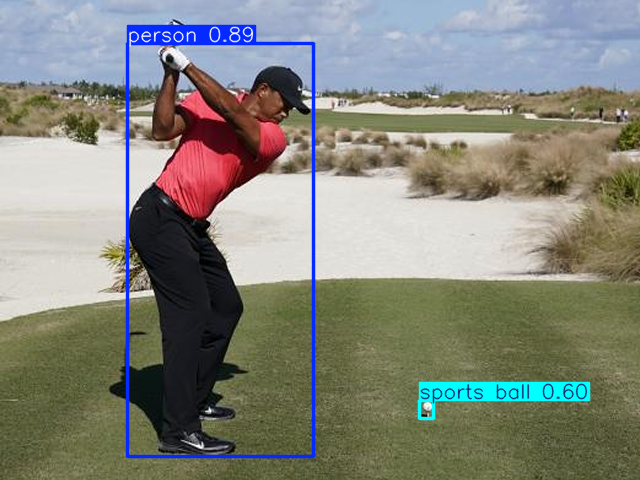


DETECTION RESULTS for 'Tiger_Woods.png'
Total objects detected: 2
----------------------------------------
Object Summary:
  • person: 1
  • sports ball: 1

Detailed List:
  1. person (confidence: 0.89)
  2. sports ball (confidence: 0.60)


Program completed!


In [5]:
# =============================================
# OBJECT DETECTION - YOLOv8
# Simple Google Colab Version
# =============================================

# Install required packages
!pip install ultralytics opencv-python pillow --quiet

# Import libraries
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import files
import os

print("=" * 50)
print("OBJECT DETECTION SYSTEM")
print("=" * 50)

# Load YOLOv8 model
print("\nLoading YOLOv8 model...")
model = YOLO('yolov8n.pt')  # Using nano version for speed
print("Model loaded successfully!")

def detect_image(image_path):
    """Detect objects in an image and display results"""
    # Check if image exists
    if not os.path.exists(image_path):
        print(f"Error: Image '{image_path}' not found!")
        return

    # Read image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not read image '{image_path}'")
        return

    # Run object detection
    results = model(img, conf=0.25)  # confidence threshold 0.25

    # Get annotated image
    annotated_img = results[0].plot()

    # Display the result
    cv2_imshow(annotated_img)

    # Print detected objects
    print(f"\n{'='*40}")
    print(f"DETECTION RESULTS for '{image_path}'")
    print(f"{'='*40}")

    if hasattr(results[0], 'boxes') and results[0].boxes is not None:
        boxes = results[0].boxes

        if len(boxes) == 0:
            print("No objects detected!")
        else:
            print(f"Total objects detected: {len(boxes)}")
            print("-" * 40)

            # Count objects by class
            object_counts = {}

            for box in boxes:
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                name = model.names[cls]

                # Add to count
                if name in object_counts:
                    object_counts[name] += 1
                else:
                    object_counts[name] = 1

            # Display summary
            print("Object Summary:")
            for obj_name, count in object_counts.items():
                print(f"  • {obj_name}: {count}")

            # Display detailed list
            print(f"\nDetailed List:")
            for i, box in enumerate(boxes, 1):
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                name = model.names[cls]
                print(f"  {i}. {name} (confidence: {conf:.2f})")
    else:
        print("No objects detected!")

    print(f"{'='*40}\n")

def use_demo_image():
    """Use a pre-defined demo image"""
    print("\n" + "="*50)
    print("DEMO IMAGE OPTION")
    print("="*50)

    print("\nDownloading demo image...")

    # Download a demo image
    !wget -q -O demo_image.jpg https://ultralytics.com/images/bus.jpg

    print("Demo image downloaded: 'demo_image.jpg'")
    print("\nRunning object detection on demo image...")

    # Detect objects in the demo image
    detect_image('demo_image.jpg')

def upload_and_detect():
    """Upload your own image and detect objects"""
    print("\n" + "="*50)
    print("UPLOAD YOUR OWN IMAGE")
    print("="*50)

    print("\nPlease upload an image file (jpg, jpeg, png):")

    # Upload file
    uploaded = files.upload()

    if not uploaded:
        print("\nNo file uploaded! Returning to menu...")
        return

    # Get the uploaded filename
    filename = list(uploaded.keys())[0]
    print(f"\nUploaded file: '{filename}'")

    # Run detection on uploaded image
    detect_image(filename)

def main_menu():
    """Main menu that runs only once"""
    print("\n" + "="*50)
    print("MAIN MENU")
    print("="*50)
    print("\nChoose an option:")
    print("1. Use Demo Image")
    print("2. Upload Your Own Image")

    choice = input("\nEnter your choice (1-2): ").strip()

    if choice == '1':
        use_demo_image()
    elif choice == '2':
        upload_and_detect()
    else:
        print("\nInvalid choice! Please run the cell again.")

    print("\n" + "="*50)
    print("Program completed!")
    print("="*50)

# =============================================
# RUN THE PROGRAM
# =============================================

if __name__ == "__main__":
    main_menu()